In [139]:
import sim
import time
import cv2
import numpy as np
from PIL import Image
from queue import PriorityQueue
import math
from numpy import sqrt
import itertools
import sys
sys.setrecursionlimit(10000)

In [140]:
def resize(img,resolution):
    scale_percent = 500 # percent of original size
    width = int(resolution[1] * scale_percent / 100)
    height = int(resolution[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized
def x_w_i(w_x):
    y=((w_x+2.5)*1280)/5
    return round(y)
def y_w_i(w_y):
    x=((2.5-w_y)*1280)/5
    return round(x)
def x_i_w(i_x):
    y=(i_x*5/1280)-2.5
    return y
def y_i_w(i_y):
    x=(2.5)-(i_y*5/1280)
    return x
def draw_rec_red(x,image):
    for i in range(120):
         for j in range(120):
                if (0<x[0]-60+i<1280 and 0<x[1]-60+j<1280):
                    image[x[0]-60+i][x[1]-60+j]=(255,0,0)
                    
                    
def draw_rec_red_c(x,y,image):
    for i in range(10):
         for j in range(10):
                if (0<x-5+i<1280 and 0<y-5+j<1280):
                    image[x-5+i][y-5+j]=(255,0,0)
def draw_rec_green_c(x,y,image):
    for i in range(10):
         for j in range(10):
                if (0<x-5+i<1280 and 0<y-5+j<1280):
                    image[x-5+i][y-5+j]=(0,255,0)

def draw_rec_blue(x,image): 
    for i in range(120):
         for j in range(120):
                if (0<x[0]-60+i<1280 and 0<x[1]-60+j<1280):
                    image[x[0]-60+i][x[1]-60+j]=(0,0,255)
                    
                    
def draw_rec_green(x,image):
    for i in range(120):
         for j in range(120):
                if (0<x[0]-60+i<1280 and 0<x[1]-60+j<1280):
                    image[x[0]-60+i][x[1]-60+j]=(0,255,0)
                    
def draw_rec_black(a,b,img):
    for i in range(256):
         for j in range(256):
                if (0<a-128+i<1280 and 0<b-128+j<1280):
                    img[a-128+i][b-128+j]=0
def draw_rec_black_c(a,b,img):
    for i in range(128):
         for j in range(128):
                if (0<a-64+i<1280 and 0<b-64+j<1280):
                    img[a-64+i][b-64+j]=0
                    
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

def obstacles_grid(img):
    # getting the walls 
    mask_wall = cv2.inRange(img, np.array([228,228,253]),np.array([230,230,2256]))
    # getting the rims
    mask_rim = cv2.inRange(img, 0, 0)
    mask_total = cv2.bitwise_or(mask_wall,mask_rim,mask_rim)
    mask_total = cv2.bitwise_not(mask_total)
    return mask_total


def dist(x,y):
    dist = sqrt( (x[0] - y[0])**2 + (x[1] - y[1])**2 )
    return round(dist)



def get(array):
    array.sort()
    return array.pop(0)
    

def put(array,data):
    array.append(data)
    array.sort()
    return array

def expand(s):
    aa=[]
    for row in s:
        for a_a in row:
            aa.append(a_a)
    return aa
def man_dis(x,y):
    x1,y1=x
    x2,y2=y
    return abs(x1-x2)+abs(y1-y2)

def conv(s):
    g=round((s/128)-0.5)
    return g
def incov(s):
    g=(s+0.5)*128
    return g


     

In [141]:
sim.simxFinish(-1)
scale_percent =600
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)
thistime = time.time()
if clientID != -1:
    res_ro, robot = sim.simxGetObjectHandle(clientID, 'Pioneer_p3dx', sim.simx_opmode_oneshot_wait)
    res_l,right_motor_handle = sim.simxGetObjectHandle(clientID,'Pioneer_p3dx_rightMotor',sim.simx_opmode_oneshot_wait)
    res_r,left_motor_handle = sim.simxGetObjectHandle(clientID,'Pioneer_p3dx_leftMotor',sim.simx_opmode_oneshot_wait)
    res_floor,floor=sim.simxGetObjectHandle(clientID,'ResizableFloor_5_25',sim.simx_opmode_blocking)
    res,camera = sim.simxGetObjectHandle(clientID, 'ss', sim.simx_opmode_oneshot_wait)
    err, resolution, image = sim.simxGetVisionSensorImage(clientID, camera, 0, sim.simx_opmode_streaming)
    while (sim.simxGetConnectionId(clientID) != -1):
        res_pos,pos=sim.simxGetObjectPosition(clientID,robot,-1,sim.simx_opmode_oneshot_wait)
        res_or,orien=sim.simxGetObjectOrientation(clientID,robot,-1,sim.simx_opmode_oneshot_wait)
        print(pos)
        #print(orien)
        err, resolution, image = sim.simxGetVisionSensorImage(clientID, camera, 0, sim.simx_opmode_buffer)
        if err == sim.simx_return_ok:
            img = np.array(image, dtype=np.uint8)
            img.resize([resolution[0], resolution[1], 3]) 
            resized=resize(img,resolution)
            image = Image.fromarray(resized, 'RGB')
        sim.simxFinish(clientID)
img_obs = obstacles_grid(resized)
img_obsc=img_obs.copy()
xs=x_w_i(pos[0])
ys=y_w_i(pos[1])
start=[0,[xs,ys]]
goal=[x_w_i(-2.25),y_w_i(2.25)]


[2.0629076957702637, -2.326442241668701, 0.13864728808403015]


In [142]:
#set a configuration space
for i in range(64,1280,128):
    for j in range(64,1280,128):
        if img_obs[i][j]==0:
            draw_rec_black(i,j,img_obsc)

for i in range(20,1280,20):
    for j in range(20,1280,20):
        if (i==20 or i==1260 or j==20 or j==1260):
            draw_rec_black_c(i,j,img_obsc)

In [143]:
def nearest(point1,openl):
    d=np.inf
    s=[]
    for i in range(len(openl)):
        if dist(point1,openl[i][1])<d:
            d=dist(point1,openl[i][1])
            s=openl[i][1]
    return s
def new_node(x_sam,x_nearest,img_obsc):
    step=50
    a=dist(x_sam,x_nearest)
    t=step/a
    if 0<t<1:
        x_a=int(((1-t)*x_nearest[0])+(t*x_sam[0]))
        y_a=int(((1-t)*x_nearest[1])+(t*x_sam[1]))
        if (0<x_a<1280) and (0<y_a<1280):
            sss=[x_a,y_a]
            return sss
def neighb(point1,openl):
    s=[]
    for a in range(len(openl)):
        ss=openl[a]
        print(ss)
        #for i in range(-110,110,1):
            #for j in range(-110,110,1):
        for i in range(-70,70,1):
            for j in range(-70,70,1):
                if point1[0]+i==ss[-1][0] and point1[1]+j==ss[-1][1]:
                    s.append(openl[a])
    return s

        
    

In [144]:
def RRT_star(start,goal,img_obsc,resized):
    size=0
    openl=[]
    openl.append(start)
    while(size<10000):
        cd=np.random.uniform(0, 1279, size=(1,2))
        x_sam=[int(cd[0][0]),int(cd[0][1])]
        x_nearest=nearest(x_sam,openl)  
        x_new=new_node(x_sam,x_nearest,img_obsc)
        if x_new!=None:
            if img_obsc[x_new[0]][x_new[1]]!=0:
                if(goal[0]-50<x_new[0]<goal[0]+50 and goal[1]-50<x_new[1]<goal[1]+50):
                    draw_rec_green_c(x_new[0],x_new[1],resized)
                    cv2.line(resized, (x_nearest[1],x_nearest[0]),(x_new[1],x_new[0]),[255,0,0],2)
                    break
                else:
                    ab=neighb(x_new,openl)
                    ab.sort()
                    d=ab[0][0]
                    ar=ab[0][1]
                    draw_rec_red_c(ar[0],ar[1],resized)
                    print('ar',ar,x_new)
                    draw_rec_red_c(x_new[0],x_new[1],resized)
                    cv2.line(resized,(x_new[1],x_new[0]),(ar[1],ar[0]),[255,0,0],2)
                    openl.append([d+ar[0],x_new])  
        size=size+1
RRT_star(start,goal,img_obsc,resized)

[0, [1168, 1236]]
ar [1168, 1236] [1185, 1189]
[0, [1168, 1236]]
[1168, [1185, 1189]]
ar [1185, 1189] [1143, 1160]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
ar [1143, 1160] [1093, 1165]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
ar [1093, 1165] [1044, 1153]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
ar [1044, 1153] [1019, 1109]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
ar [1044, 1153] [975, 1084]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
ar [975, 1084] [961, 1035]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
ar [961, 1035] [961, 985]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353,

[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
ar [1168, 374] [1176, 324]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
ar [1176, 324] [1140, 289]
[0, [1168, 1236]]
[1168, 

[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969]]
[14368, [1047, 631]]
[29246, [902, 170]]
ar [1069, 218] [1100, 178]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [96

[31768, [735, 228]]
[32503, [685, 230]]
[33188, [650, 266]]
ar [650, 266] [603, 285]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969]]
[14368, [1047, 631]]
[29246, [902, 170]]
[27258, [1100, 178]]
[30148, [884, 217]]
[5633, [1004, 11

[33838, [603, 285]]
[6891, [1194, 947]]
[31031, [838, 100]]
[34441, [578, 328]]
[12458, [1071, 784]]
[4632, [1177, 1059]]
[34441, [579, 240]]
[5759, [1083, 1035]]
[28358, [1145, 157]]
[30148, [969, 106]]
ar [1145, 157] [1193, 167]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142

[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969]]
[14368, [1047, 631]]
[29246, [902, 170]]
[27258, [1100, 178]]
[30148, [884, 217]]
[5633, [1004, 1184]]
[30148, [883, 123]]
[30148, [835, 229]]
[30983, [785, 222]]
[31768, [735, 228]]


[35626, [580, 410]]
[31768, [747, 276]]
[21530, [972, 408]]
[36206, [580, 460]]
[36206, [630, 462]]
[21632, [1175, 522]]
[36786, [647, 508]]
[32503, [697, 181]]
ar [647, 508] [639, 557]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969

[37433, [639, 557]]
[35626, [674, 438]]
[38072, [640, 607]]
[38712, [616, 651]]
[39328, [569, 669]]
ar [616, 651] [579, 717]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969]]
[14368, [1047, 631]]
[29246, [902, 170]]
[27258, [1100, 17

[34441, [578, 328]]
[12458, [1071, 784]]
[4632, [1177, 1059]]
[34441, [579, 240]]
[5759, [1083, 1035]]
[28358, [1145, 157]]
[30148, [969, 106]]
[29503, [1193, 167]]
[21632, [1191, 475]]
[12458, [1078, 833]]
[31869, [790, 114]]
[35019, [607, 368]]
[21530, [1004, 369]]
[28358, [1122, 112]]
[35626, [580, 410]]
[31768, [747, 276]]
[21530, [972, 408]]
[36206, [580, 460]]
[36206, [630, 462]]
[21632, [1175, 522]]
[36786, [647, 508]]
[32503, [697, 181]]
[37433, [639, 557]]
[35626, [674, 438]]
[38072, [640, 607]]
[38712, [616, 651]]
[39328, [569, 669]]
[39328, [579, 717]]
[32515, [766, 322]]
[39907, [546, 754]]
[33200, [694, 131]]
[39907, [623, 740]]
[40453, [527, 800]]
[40453, [477, 797]]
[40930, [465, 845]]
ar [569, 669] [521, 654]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[1240

[35019, [607, 368]]
[21530, [1004, 369]]
[28358, [1122, 112]]
[35626, [580, 410]]
[31768, [747, 276]]
[21530, [972, 408]]
[36206, [580, 460]]
[36206, [630, 462]]
[21632, [1175, 522]]
[36786, [647, 508]]
[32503, [697, 181]]
[37433, [639, 557]]
[35626, [674, 438]]
[38072, [640, 607]]
[38712, [616, 651]]
[39328, [569, 669]]
[39328, [579, 717]]
[32515, [766, 322]]
[39907, [546, 754]]
[33200, [694, 131]]
[39907, [623, 740]]
[40453, [527, 800]]
[40453, [477, 797]]
[40930, [465, 845]]
[39897, [521, 654]]
[13529, [1116, 763]]
[40418, [480, 625]]
[40898, [433, 606]]
[41395, [465, 895]]
[41860, [424, 924]]
ar [424, 924] [401, 968]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [9

[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969]]
[14368, [1047, 631]]
[29246, [902, 170]]
[27258, [1100, 178]]
[30148, [884, 217]]
[5633, [1004, 1184]]
[30148, [883, 123]]
[30148, [835, 229]]
[30983, [785, 222]]
[31768, [735, 228]]
[32503, [685, 230]]
[33188, [650, 266]]
[33838, [603, 285]]
[6891, [1194, 947]]
[31031, [838, 100]]
[34441, [578, 328]]
[12458, [1071, 784]]
[4632, [1177, 1059]]
[34441, [579, 240]]
[5759, [1083, 1035]]
[28358, [1145, 157]]
[30148, [969, 106]]
[29503, [1193, 167]]
[21632, [1191, 475]]
[12458, [1078, 833]]
[31869, [790, 114]]
[35019, [607, 368]]
[21530, [1004, 369]]
[28358, [1122, 112]]
[35626, [580, 410]]
[31768, [747, 276]]
[21530, [972, 408]]
[36206, [580, 460]]
[36206, [630, 462]]
[21632, [1175, 522]]
[36786, [647, 508]]
[32503, [697, 181]]
[37433, [639, 557]]

[32515, [766, 322]]
[39907, [546, 754]]
[33200, [694, 131]]
[39907, [623, 740]]
[40453, [527, 800]]
[40453, [477, 797]]
[40930, [465, 845]]
[39897, [521, 654]]
[13529, [1116, 763]]
[40418, [480, 625]]
[40898, [433, 606]]
[41395, [465, 895]]
[41860, [424, 924]]
[42284, [401, 968]]
[42685, [429, 1009]]
[29246, [940, 239]]
[41331, [390, 579]]
[41721, [343, 597]]
[42064, [304, 628]]
[42368, [273, 588]]
[42368, [264, 658]]
[42685, [351, 960]]
[40530, [672, 749]]
[43036, [329, 914]]
ar [1047, 631] [1096, 636]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413

[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969]]
[14368, [1047, 631]]
[29246, [902, 170]]
[27258, [1100, 178]]
[30148, [884, 217]]
[5633, [1004, 1184]]
[30148, [883, 123]]
[30148, [835, 229]]
[30983, [785, 222]]
[31768, [735, 228]]
[32503, [685, 230]]
[33188, [650, 266]]
[33838, [603, 285]]
[6891, [1194, 947]]
[31031, [838, 100]]
[34441, [578, 328]]
[12458, [1071, 784]]
[4632, [1177, 1059]]
[34441, [579, 240]]
[5759, [1083, 1035]]
[28358, [1145, 157]]
[30148, [969, 10

[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969]]
[14368, [1047, 631]]
[29246, [902, 170]]
[27258, [1100, 178]]
[30148, [884, 217]]
[5633, [1004, 1184]]
[30148, [883, 123]]
[30148, [835, 229]]
[30983, [785, 222]]
[31768, [735, 228]]
[32503, [685, 230]]
[33188, [650, 266]]
[33838, [603, 285]]
[6891, [1194, 947]]
[31031, [838, 100]]
[34441, [578, 328]]
[12458, [1071, 784]]
[4632, [1177, 1059]]
[34441, [579, 240]]
[5759, [1083, 1035]]
[28358, [1145, 157]]
[30148, [969, 106]]
[29503, [1193, 167]]
[21632, [1191, 475]]
[12458, [1078, 833]]
[31869, [790, 114]]
[35019, [607, 368]]
[21530, [1004, 369]]
[28358, [1122

[40930, [465, 845]]
[39897, [521, 654]]
[13529, [1116, 763]]
[40418, [480, 625]]
[40898, [433, 606]]
[41395, [465, 895]]
[41860, [424, 924]]
[42284, [401, 968]]
[42685, [429, 1009]]
[29246, [940, 239]]
[41331, [390, 579]]
[41721, [343, 597]]
[42064, [304, 628]]
[42368, [273, 588]]
[42368, [264, 658]]
[42685, [351, 960]]
[40530, [672, 749]]
[43036, [329, 914]]
[15415, [1096, 636]]
[43114, [437, 1058]]
[43551, [456, 1103]]
[43036, [309, 988]]
[42641, [223, 581]]
[40930, [452, 753]]
[42864, [185, 614]]
[39897, [540, 607]]
[43345, [298, 1036]]
[41382, [402, 762]]
[43049, [135, 623]]
[38072, [690, 607]]
[42284, [376, 896]]
[7993, [1097, 919]]
ar [223, 581] [203, 534]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, 

[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969]]
[14368, [1047, 631]]
[29246, [902, 170]]
[27258, [1100, 178]]
[30148, [884, 217]]
[5633, [1004, 1184]]
[30148, [883, 123]]
[30148, [835, 229]]
[30983, [785, 222]]
[31768, [735, 228]]
[32503, [685, 230]]
[33188, [650, 266]]
[33838, [603, 285]]
[6891, [1194, 947]]
[31031, [838, 100]]
[34441, [578, 328]]
[12458, [1071, 784]]
[4632, [1177, 1059]]
[34441, [579, 240]]
[5759, [1083, 1035]]
[28358, [1145, 157]]
[30148, [969, 106]]
[29503, [1193, 167]]
[21632, [1191, 475]]
[12458, [1078, 833]]
[31869, [790, 114]]
[35019, [607, 368]]
[21530, [1004, 369]]
[28358, [1122, 112]]
[35626, [580, 410]]
[31768, [747, 276]]
[21530, [972, 408]]
[36206, [580, 460]]
[36206, [630, 462]]
[21632, [1175, 522]]
[36786, [647, 508

[13529, [1116, 763]]
[40418, [480, 625]]
[40898, [433, 606]]
[41395, [465, 895]]
[41860, [424, 924]]
[42284, [401, 968]]
[42685, [429, 1009]]
[29246, [940, 239]]
[41331, [390, 579]]
[41721, [343, 597]]
[42064, [304, 628]]
[42368, [273, 588]]
[42368, [264, 658]]
[42685, [351, 960]]
[40530, [672, 749]]
[43036, [329, 914]]
[15415, [1096, 636]]
[43114, [437, 1058]]
[43551, [456, 1103]]
[43036, [309, 988]]
[42641, [223, 581]]
[40930, [452, 753]]
[42864, [185, 614]]
[39897, [540, 607]]
[43345, [298, 1036]]
[41382, [402, 762]]
[43049, [135, 623]]
[38072, [690, 607]]
[42284, [376, 896]]
[7993, [1097, 919]]
[42864, [203, 534]]
[43643, [255, 1061]]
[43898, [216, 1093]]
[44114, [183, 1054]]
[44297, [152, 1014]]
[43551, [506, 1101]]
[44057, [537, 1140]]
[44057, [575, 1108]]
ar [152, 1014] [128, 969]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]


[21530, [972, 408]]
[36206, [580, 460]]
[36206, [630, 462]]
[21632, [1175, 522]]
[36786, [647, 508]]
[32503, [697, 181]]
[37433, [639, 557]]
[35626, [674, 438]]
[38072, [640, 607]]
[38712, [616, 651]]
[39328, [569, 669]]
[39328, [579, 717]]
[32515, [766, 322]]
[39907, [546, 754]]
[33200, [694, 131]]
[39907, [623, 740]]
[40453, [527, 800]]
[40453, [477, 797]]
[40930, [465, 845]]
[39897, [521, 654]]
[13529, [1116, 763]]
[40418, [480, 625]]
[40898, [433, 606]]
[41395, [465, 895]]
[41860, [424, 924]]
[42284, [401, 968]]
[42685, [429, 1009]]
[29246, [940, 239]]
[41331, [390, 579]]
[41721, [343, 597]]
[42064, [304, 628]]
[42368, [273, 588]]
[42368, [264, 658]]
[42685, [351, 960]]
[40530, [672, 749]]
[43036, [329, 914]]
[15415, [1096, 636]]
[43114, [437, 1058]]
[43551, [456, 1103]]
[43036, [309, 988]]
[42641, [223, 581]]
[40930, [452, 753]]
[42864, [185, 614]]
[39897, [540, 607]]
[43345, [298, 1036]]
[41382, [402, 762]]
[43049, [135, 623]]
[38072, [690, 607]]
[42284, [376, 896]]
[7993, [1097,

[30148, [883, 123]]
[30148, [835, 229]]
[30983, [785, 222]]
[31768, [735, 228]]
[32503, [685, 230]]
[33188, [650, 266]]
[33838, [603, 285]]
[6891, [1194, 947]]
[31031, [838, 100]]
[34441, [578, 328]]
[12458, [1071, 784]]
[4632, [1177, 1059]]
[34441, [579, 240]]
[5759, [1083, 1035]]
[28358, [1145, 157]]
[30148, [969, 106]]
[29503, [1193, 167]]
[21632, [1191, 475]]
[12458, [1078, 833]]
[31869, [790, 114]]
[35019, [607, 368]]
[21530, [1004, 369]]
[28358, [1122, 112]]
[35626, [580, 410]]
[31768, [747, 276]]
[21530, [972, 408]]
[36206, [580, 460]]
[36206, [630, 462]]
[21632, [1175, 522]]
[36786, [647, 508]]
[32503, [697, 181]]
[37433, [639, 557]]
[35626, [674, 438]]
[38072, [640, 607]]
[38712, [616, 651]]
[39328, [569, 669]]
[39328, [579, 717]]
[32515, [766, 322]]
[39907, [546, 754]]
[33200, [694, 131]]
[39907, [623, 740]]
[40453, [527, 800]]
[40453, [477, 797]]
[40930, [465, 845]]
[39897, [521, 654]]
[13529, [1116, 763]]
[40418, [480, 625]]
[40898, [433, 606]]
[41395, [465, 895]]
[41860, [

[21632, [1191, 475]]
[12458, [1078, 833]]
[31869, [790, 114]]
[35019, [607, 368]]
[21530, [1004, 369]]
[28358, [1122, 112]]
[35626, [580, 410]]
[31768, [747, 276]]
[21530, [972, 408]]
[36206, [580, 460]]
[36206, [630, 462]]
[21632, [1175, 522]]
[36786, [647, 508]]
[32503, [697, 181]]
[37433, [639, 557]]
[35626, [674, 438]]
[38072, [640, 607]]
[38712, [616, 651]]
[39328, [569, 669]]
[39328, [579, 717]]
[32515, [766, 322]]
[39907, [546, 754]]
[33200, [694, 131]]
[39907, [623, 740]]
[40453, [527, 800]]
[40453, [477, 797]]
[40930, [465, 845]]
[39897, [521, 654]]
[13529, [1116, 763]]
[40418, [480, 625]]
[40898, [433, 606]]
[41395, [465, 895]]
[41860, [424, 924]]
[42284, [401, 968]]
[42685, [429, 1009]]
[29246, [940, 239]]
[41331, [390, 579]]
[41721, [343, 597]]
[42064, [304, 628]]
[42368, [273, 588]]
[42368, [264, 658]]
[42685, [351, 960]]
[40530, [672, 749]]
[43036, [329, 914]]
[15415, [1096, 636]]
[43114, [437, 1058]]
[43551, [456, 1103]]
[43036, [309, 988]]
[42641, [223, 581]]
[40930, [4

[33838, [603, 285]]
[6891, [1194, 947]]
[31031, [838, 100]]
[34441, [578, 328]]
[12458, [1071, 784]]
[4632, [1177, 1059]]
[34441, [579, 240]]
[5759, [1083, 1035]]
[28358, [1145, 157]]
[30148, [969, 106]]
[29503, [1193, 167]]
[21632, [1191, 475]]
[12458, [1078, 833]]
[31869, [790, 114]]
[35019, [607, 368]]
[21530, [1004, 369]]
[28358, [1122, 112]]
[35626, [580, 410]]
[31768, [747, 276]]
[21530, [972, 408]]
[36206, [580, 460]]
[36206, [630, 462]]
[21632, [1175, 522]]
[36786, [647, 508]]
[32503, [697, 181]]
[37433, [639, 557]]
[35626, [674, 438]]
[38072, [640, 607]]
[38712, [616, 651]]
[39328, [569, 669]]
[39328, [579, 717]]
[32515, [766, 322]]
[39907, [546, 754]]
[33200, [694, 131]]
[39907, [623, 740]]
[40453, [527, 800]]
[40453, [477, 797]]
[40930, [465, 845]]
[39897, [521, 654]]
[13529, [1116, 763]]
[40418, [480, 625]]
[40898, [433, 606]]
[41395, [465, 895]]
[41860, [424, 924]]
[42284, [401, 968]]
[42685, [429, 1009]]
[29246, [940, 239]]
[41331, [390, 579]]
[41721, [343, 597]]
[42064, 

[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969]]
[14368, [1047, 631]]
[29246, [902, 170]]
[27258, [1100, 178]]
[30148, [884, 217]]
[5633, [1004, 1184]]
[30148, [883, 123]]
[30148, [835, 229]]
[30983, [785, 222]]
[31768, [735, 228]]
[32503, [685, 230]]
[33188, [650, 266]]
[33838, [603, 285]]
[6891, [1194, 947]]
[31031, [838, 100]]
[34441, [578, 328]]
[12458, [1071, 784]]
[4632, [1177, 1059]]
[34441, [579, 240]]
[5759, [1083, 1035]

[44297, [152, 1014]]
[43551, [506, 1101]]
[44057, [537, 1140]]
[44057, [575, 1108]]
[44449, [128, 969]]
[3496, [1087, 1094]]
[44114, [194, 1137]]
[43067, [204, 483]]
[44308, [235, 1164]]
[43271, [188, 435]]
[44057, [551, 1063]]
[44594, [516, 1185]]
[40530, [683, 797]]
[44594, [606, 1146]]
[44007, [427, 1143]]
[43459, [161, 392]]
[41213, [688, 847]]
[45200, [636, 1186]]
[43620, [137, 347]]
[41901, [664, 891]]
[16511, [1145, 630]]
[14645, [1166, 768]]
[43184, [106, 664]]
[32515, [716, 325]]
[17656, [1188, 655]]
[43459, [231, 410]]
[43757, [143, 297]]
[41860, [500, 930]]
[43184, [94, 593]]
ar [427, 1143] [399, 1184]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]

[40453, [527, 800]]
[40453, [477, 797]]
[40930, [465, 845]]
[39897, [521, 654]]
[13529, [1116, 763]]
[40418, [480, 625]]
[40898, [433, 606]]
[41395, [465, 895]]
[41860, [424, 924]]
[42284, [401, 968]]
[42685, [429, 1009]]
[29246, [940, 239]]
[41331, [390, 579]]
[41721, [343, 597]]
[42064, [304, 628]]
[42368, [273, 588]]
[42368, [264, 658]]
[42685, [351, 960]]
[40530, [672, 749]]
[43036, [329, 914]]
[15415, [1096, 636]]
[43114, [437, 1058]]
[43551, [456, 1103]]
[43036, [309, 988]]
[42641, [223, 581]]
[40930, [452, 753]]
[42864, [185, 614]]
[39897, [540, 607]]
[43345, [298, 1036]]
[41382, [402, 762]]
[43049, [135, 623]]
[38072, [690, 607]]
[42284, [376, 896]]
[7993, [1097, 919]]
[42864, [203, 534]]
[43643, [255, 1061]]
[43898, [216, 1093]]
[44114, [183, 1054]]
[44297, [152, 1014]]
[43551, [506, 1101]]
[44057, [537, 1140]]
[44057, [575, 1108]]
[44449, [128, 969]]
[3496, [1087, 1094]]
[44114, [194, 1137]]
[43067, [204, 483]]
[44308, [235, 1164]]
[43271, [188, 435]]
[44057, [551, 1063]]
[44

[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969]]
[14368, [1047, 631]]
[29246, [902, 170]]
[27258, [1100, 178]]
[30148, [884, 217]]
[5633, [1004, 1184]]
[30148, [883, 123]]
[30148, [835, 229]]
[30983, [785, 222]]
[31768, [735, 228]]
[32503, [685, 230]]
[33188, [650, 266]]
[33838, [603, 285]]
[6891, [1194, 947]]
[31031, [838, 100]]
[34441, [578, 328]]
[12458, [1071, 784]]
[4632, [1177, 1059]]
[34441, [579, 240]]
[5759, [1083, 1035]]
[28358, [1145, 15

[43900, [181, 264]]
[42360, [545, 949]]
[44449, [85, 995]]
[43365, [286, 887]]
[44081, [155, 221]]
[43690, [264, 372]]
[42565, [655, 940]]
[32515, [816, 318]]
[43651, [259, 845]]
ar [1004, 369] [1010, 319]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152

[14645, [1166, 768]]
[43184, [106, 664]]
[32515, [716, 325]]
[17656, [1188, 655]]
[43459, [231, 410]]
[43757, [143, 297]]
[41860, [500, 930]]
[43184, [94, 593]]
[44434, [399, 1184]]
[33231, [781, 369]]
[43345, [259, 990]]
[12458, [1080, 727]]
[44308, [164, 1177]]
[43290, [140, 700]]
[43900, [181, 264]]
[42360, [545, 949]]
[44449, [85, 995]]
[43365, [286, 887]]
[44081, [155, 221]]
[43690, [264, 372]]
[42565, [655, 940]]
[32515, [816, 318]]
[43651, [259, 845]]
[22534, [1010, 319]]
[44472, [114, 1183]]
[42368, [326, 672]]
[22502, [922, 404]]
ar [259, 990] [238, 944]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326,

[38712, [616, 651]]
[39328, [569, 669]]
[39328, [579, 717]]
[32515, [766, 322]]
[39907, [546, 754]]
[33200, [694, 131]]
[39907, [623, 740]]
[40453, [527, 800]]
[40453, [477, 797]]
[40930, [465, 845]]
[39897, [521, 654]]
[13529, [1116, 763]]
[40418, [480, 625]]
[40898, [433, 606]]
[41395, [465, 895]]
[41860, [424, 924]]
[42284, [401, 968]]
[42685, [429, 1009]]
[29246, [940, 239]]
[41331, [390, 579]]
[41721, [343, 597]]
[42064, [304, 628]]
[42368, [273, 588]]
[42368, [264, 658]]
[42685, [351, 960]]
[40530, [672, 749]]
[43036, [329, 914]]
[15415, [1096, 636]]
[43114, [437, 1058]]
[43551, [456, 1103]]
[43036, [309, 988]]
[42641, [223, 581]]
[40930, [452, 753]]
[42864, [185, 614]]
[39897, [540, 607]]
[43345, [298, 1036]]
[41382, [402, 762]]
[43049, [135, 623]]
[38072, [690, 607]]
[42284, [376, 896]]
[7993, [1097, 919]]
[42864, [203, 534]]
[43643, [255, 1061]]
[43898, [216, 1093]]
[44114, [183, 1054]]
[44297, [152, 1014]]
[43551, [506, 1101]]
[44057, [537, 1140]]
[44057, [575, 1108]]
[44449,

[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969]]
[14368, [1047, 631]]
[29246, [902, 170]]
[27258, [1100, 178]]
[30148, [884, 217]]
[5633, [1004, 1184]]
[30148, [883, 123]]
[30148, [835, 229]]
[30983, [785, 222]]
[31768, [735, 228]]
[32503, [685, 230]]
[33188, [650, 266]]
[33838, [603, 285]]
[6891, [1194, 947]]
[31031, [838, 100]]
[34441, [578, 328]]
[12458, [1071, 784]]
[4632, [1177, 1059]]
[34441, [579, 240]]
[5759, [1083, 1035]]
[28358, [1145, 157]]
[30148, [969, 106]]
[29503, [1193, 167]]
[21632, [1191, 475]]
[12458, [1078, 833]]
[31869, [790, 114]]
[35019, [607, 368]]
[21530, [1004, 369]]
[28358, [1122, 112]]
[35626, [580, 410]]
[31768, [747, 276]]
[21530, [972, 408]]
[36206, [580, 460]]
[36206, [630, 462]]
[21632, [1175, 522]]
[36786, [647, 508]]
[32503, [697, 181]]
[37433, [639, 557]]
[35626, [674, 438]]
[38072, [640, 607]]
[38712, [616, 651]]
[39328, [569, 669]]
[39328, [579, 717]]
[325

[42368, [264, 658]]
[42685, [351, 960]]
[40530, [672, 749]]
[43036, [329, 914]]
[15415, [1096, 636]]
[43114, [437, 1058]]
[43551, [456, 1103]]
[43036, [309, 988]]
[42641, [223, 581]]
[40930, [452, 753]]
[42864, [185, 614]]
[39897, [540, 607]]
[43345, [298, 1036]]
[41382, [402, 762]]
[43049, [135, 623]]
[38072, [690, 607]]
[42284, [376, 896]]
[7993, [1097, 919]]
[42864, [203, 534]]
[43643, [255, 1061]]
[43898, [216, 1093]]
[44114, [183, 1054]]
[44297, [152, 1014]]
[43551, [506, 1101]]
[44057, [537, 1140]]
[44057, [575, 1108]]
[44449, [128, 969]]
[3496, [1087, 1094]]
[44114, [194, 1137]]
[43067, [204, 483]]
[44308, [235, 1164]]
[43271, [188, 435]]
[44057, [551, 1063]]
[44594, [516, 1185]]
[40530, [683, 797]]
[44594, [606, 1146]]
[44007, [427, 1143]]
[43459, [161, 392]]
[41213, [688, 847]]
[45200, [636, 1186]]
[43620, [137, 347]]
[41901, [664, 891]]
[16511, [1145, 630]]
[14645, [1166, 768]]
[43184, [106, 664]]
[32515, [716, 325]]
[17656, [1188, 655]]
[43459, [231, 410]]
[43757, [143, 297]

[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969]]
[14368, [1047, 631]]
[29246, [902, 170]]
[27258, [1100, 178]]
[30148, [884, 217]]
[5633, [1004, 1184]]
[30148, [883, 123]]
[30148, [835, 229]]
[30983, [785, 222]]
[31768, [735, 228]]
[32503, [685, 230]]
[33188, [650, 266]]
[33838, [603, 285]]
[6891, [1194, 947]]
[31031, [838, 100]]
[34441, [578, 328]]
[12458, [1071, 784]]
[4632, [1177, 1059]]
[34441, [579, 240]]
[5759, [1083, 1035]]
[28358, [1145, 157]]
[30148, [969, 106]]
[29503, [1193, 167]]
[21632, [1191, 475]]
[12458, [1078, 833]]
[31869, [790, 114]]
[35019, [607, 368]]
[21530, [1004, 369]]
[28358, [1122, 112]]
[35626, [580, 410]]
[31768, [747, 276]]
[21530, [972, 408]]
[36206, [580, 460]]
[36206, [630, 462]]
[21632, [1175, 522]]
[36786, [647, 508]]
[32503, [697, 181]]
[37433, [639, 557]]
[35626, [674, 438]]
[38072, [640, 607]]
[38712, [616, 651]]
[3

[14645, [1166, 768]]
[43184, [106, 664]]
[32515, [716, 325]]
[17656, [1188, 655]]
[43459, [231, 410]]
[43757, [143, 297]]
[41860, [500, 930]]
[43184, [94, 593]]
[44434, [399, 1184]]
[33231, [781, 369]]
[43345, [259, 990]]
[12458, [1080, 727]]
[44308, [164, 1177]]
[43290, [140, 700]]
[43900, [181, 264]]
[42360, [545, 949]]
[44449, [85, 995]]
[43365, [286, 887]]
[44081, [155, 221]]
[43690, [264, 372]]
[42565, [655, 940]]
[32515, [816, 318]]
[43651, [259, 845]]
[22534, [1010, 319]]
[44472, [114, 1183]]
[42368, [326, 672]]
[22502, [922, 404]]
[43604, [238, 944]]
[44081, [219, 232]]
[43757, [87, 350]]
[45836, [686, 1189]]
[45836, [678, 1139]]
[33894, [658, 96]]
[45200, [660, 1091]]
[40980, [556, 840]]
[42864, [156, 516]]
[13383, [1042, 692]]
[34552, [614, 121]]
[44577, [124, 919]]
[30983, [797, 163]]
[44236, [124, 181]]
[44300, [269, 230]]
[13538, [1121, 698]]
[40530, [689, 702]]
[43954, [310, 354]]
[44569, [315, 211]]
ar [140, 700] [183, 725]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [

[44057, [551, 1063]]
[44594, [516, 1185]]
[40530, [683, 797]]
[44594, [606, 1146]]
[44007, [427, 1143]]
[43459, [161, 392]]
[41213, [688, 847]]
[45200, [636, 1186]]
[43620, [137, 347]]
[41901, [664, 891]]
[16511, [1145, 630]]
[14645, [1166, 768]]
[43184, [106, 664]]
[32515, [716, 325]]
[17656, [1188, 655]]
[43459, [231, 410]]
[43757, [143, 297]]
[41860, [500, 930]]
[43184, [94, 593]]
[44434, [399, 1184]]
[33231, [781, 369]]
[43345, [259, 990]]
[12458, [1080, 727]]
[44308, [164, 1177]]
[43290, [140, 700]]
[43900, [181, 264]]
[42360, [545, 949]]
[44449, [85, 995]]
[43365, [286, 887]]
[44081, [155, 221]]
[43690, [264, 372]]
[42565, [655, 940]]
[32515, [816, 318]]
[43651, [259, 845]]
[22534, [1010, 319]]
[44472, [114, 1183]]
[42368, [326, 672]]
[22502, [922, 404]]
[43604, [238, 944]]
[44081, [219, 232]]
[43757, [87, 350]]
[45836, [686, 1189]]
[45836, [678, 1139]]
[33894, [658, 96]]
[45200, [660, 1091]]
[40980, [556, 840]]
[42864, [156, 516]]
[13383, [1042, 692]]
[34552, [614, 121]]
[44577,

[44081, [155, 221]]
[43690, [264, 372]]
[42565, [655, 940]]
[32515, [816, 318]]
[43651, [259, 845]]
[22534, [1010, 319]]
[44472, [114, 1183]]
[42368, [326, 672]]
[22502, [922, 404]]
[43604, [238, 944]]
[44081, [219, 232]]
[43757, [87, 350]]
[45836, [686, 1189]]
[45836, [678, 1139]]
[33894, [658, 96]]
[45200, [660, 1091]]
[40980, [556, 840]]
[42864, [156, 516]]
[13383, [1042, 692]]
[34552, [614, 121]]
[44577, [124, 919]]
[30983, [797, 163]]
[44236, [124, 181]]
[44300, [269, 230]]
[13538, [1121, 698]]
[40530, [689, 702]]
[43954, [310, 354]]
[44569, [315, 211]]
[43430, [183, 725]]
[44297, [136, 1071]]
[13529, [1127, 824]]
[43690, [292, 413]]
[44360, [88, 145]]
ar [136, 1071] [86, 1069]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383,

[21632, [1191, 475]]
[12458, [1078, 833]]
[31869, [790, 114]]
[35019, [607, 368]]
[21530, [1004, 369]]
[28358, [1122, 112]]
[35626, [580, 410]]
[31768, [747, 276]]
[21530, [972, 408]]
[36206, [580, 460]]
[36206, [630, 462]]
[21632, [1175, 522]]
[36786, [647, 508]]
[32503, [697, 181]]
[37433, [639, 557]]
[35626, [674, 438]]
[38072, [640, 607]]
[38712, [616, 651]]
[39328, [569, 669]]
[39328, [579, 717]]
[32515, [766, 322]]
[39907, [546, 754]]
[33200, [694, 131]]
[39907, [623, 740]]
[40453, [527, 800]]
[40453, [477, 797]]
[40930, [465, 845]]
[39897, [521, 654]]
[13529, [1116, 763]]
[40418, [480, 625]]
[40898, [433, 606]]
[41395, [465, 895]]
[41860, [424, 924]]
[42284, [401, 968]]
[42685, [429, 1009]]
[29246, [940, 239]]
[41331, [390, 579]]
[41721, [343, 597]]
[42064, [304, 628]]
[42368, [273, 588]]
[42368, [264, 658]]
[42685, [351, 960]]
[40530, [672, 749]]
[43036, [329, 914]]
[15415, [1096, 636]]
[43114, [437, 1058]]
[43551, [456, 1103]]
[43036, [309, 988]]
[42641, [223, 581]]
[40930, [4

[13383, [1042, 692]]
[34552, [614, 121]]
[44577, [124, 919]]
[30983, [797, 163]]
[44236, [124, 181]]
[44300, [269, 230]]
[13538, [1121, 698]]
[40530, [689, 702]]
[43954, [310, 354]]
[44569, [315, 211]]
[43430, [183, 725]]
[44297, [136, 1071]]
[13529, [1127, 824]]
[43690, [292, 413]]
[44360, [88, 145]]
[44433, [86, 1069]]
[44608, [588, 1028]]
[44569, [310, 161]]
[44879, [312, 111]]
[44833, [349, 1193]]
[44879, [263, 101]]
[42064, [294, 543]]
ar [1127, 824] [1173, 842]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[

[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969]]
[14368, [1047, 631]]
[29246, [902, 170]]
[27258, [1100, 178]]
[30148, [884, 217]]
[5633, [1004, 1184]]
[30148, [883, 123]]
[30148, [835, 229]]
[30983, [785, 222]]
[31768, [735, 228]]


[23424, [876, 425]]
[44701, [88, 884]]
[44434, [377, 1133]]
ar [264, 658] [272, 707]
[0, [1168, 1236]]
[1168, [1185, 1189]]
[2353, [1143, 1160]]
[3496, [1093, 1165]]
[4589, [1044, 1153]]
[5633, [1019, 1109]]
[5633, [975, 1084]]
[6608, [961, 1035]]
[7569, [961, 985]]
[8530, [966, 935]]
[9496, [975, 885]]
[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969]]
[14368, [1047, 631]]
[29246, [902, 170]]
[27258, [1100, 178]]
[30148, [884, 217]]
[5633, [1004, 11

[31768, [747, 276]]
[21530, [972, 408]]
[36206, [580, 460]]
[36206, [630, 462]]
[21632, [1175, 522]]
[36786, [647, 508]]
[32503, [697, 181]]
[37433, [639, 557]]
[35626, [674, 438]]
[38072, [640, 607]]
[38712, [616, 651]]
[39328, [569, 669]]
[39328, [579, 717]]
[32515, [766, 322]]
[39907, [546, 754]]
[33200, [694, 131]]
[39907, [623, 740]]
[40453, [527, 800]]
[40453, [477, 797]]
[40930, [465, 845]]
[39897, [521, 654]]
[13529, [1116, 763]]
[40418, [480, 625]]
[40898, [433, 606]]
[41395, [465, 895]]
[41860, [424, 924]]
[42284, [401, 968]]
[42685, [429, 1009]]
[29246, [940, 239]]
[41331, [390, 579]]
[41721, [343, 597]]
[42064, [304, 628]]
[42368, [273, 588]]
[42368, [264, 658]]
[42685, [351, 960]]
[40530, [672, 749]]
[43036, [329, 914]]
[15415, [1096, 636]]
[43114, [437, 1058]]
[43551, [456, 1103]]
[43036, [309, 988]]
[42641, [223, 581]]
[40930, [452, 753]]
[42864, [185, 614]]
[39897, [540, 607]]
[43345, [298, 1036]]
[41382, [402, 762]]
[43049, [135, 623]]
[38072, [690, 607]]
[42284, [376,

[10471, [966, 835]]
[11437, [971, 785]]
[12408, [975, 735]]
[3496, [1136, 1110]]
[13383, [985, 686]]
[14368, [997, 637]]
[15365, [967, 596]]
[16332, [994, 553]]
[17326, [1039, 531]]
[11437, [1021, 784]]
[17326, [961, 515]]
[4632, [1127, 1060]]
[18365, [1048, 481]]
[19413, [1077, 440]]
[5759, [1132, 1010]]
[20490, [1105, 398]]
[21595, [1149, 421]]
[21595, [1168, 374]]
[22763, [1176, 324]]
[23939, [1140, 289]]
[20490, [1040, 405]]
[25079, [1110, 248]]
[26189, [1069, 218]]
[5759, [1180, 996]]
[27258, [1019, 209]]
[28277, [969, 199]]
[20490, [1142, 470]]
[29246, [949, 152]]
[6891, [1102, 969]]
[14368, [1047, 631]]
[29246, [902, 170]]
[27258, [1100, 178]]
[30148, [884, 217]]
[5633, [1004, 1184]]
[30148, [883, 123]]
[30148, [835, 229]]
[30983, [785, 222]]
[31768, [735, 228]]
[32503, [685, 230]]
[33188, [650, 266]]
[33838, [603, 285]]
[6891, [1194, 947]]
[31031, [838, 100]]
[34441, [578, 328]]
[12458, [1071, 784]]
[4632, [1177, 1059]]
[34441, [579, 240]]
[5759, [1083, 1035]]
[28358, [1145, 15

[23424, [876, 425]]
[44701, [88, 884]]
[44434, [377, 1133]]
[42632, [272, 707]]
[34012, [771, 418]]
[36786, [584, 510]]
[21632, [1126, 535]]
[43049, [185, 664]]
[41784, [352, 766]]
[29480, [1072, 106]]
ar [298, 1036] [351, 1090]


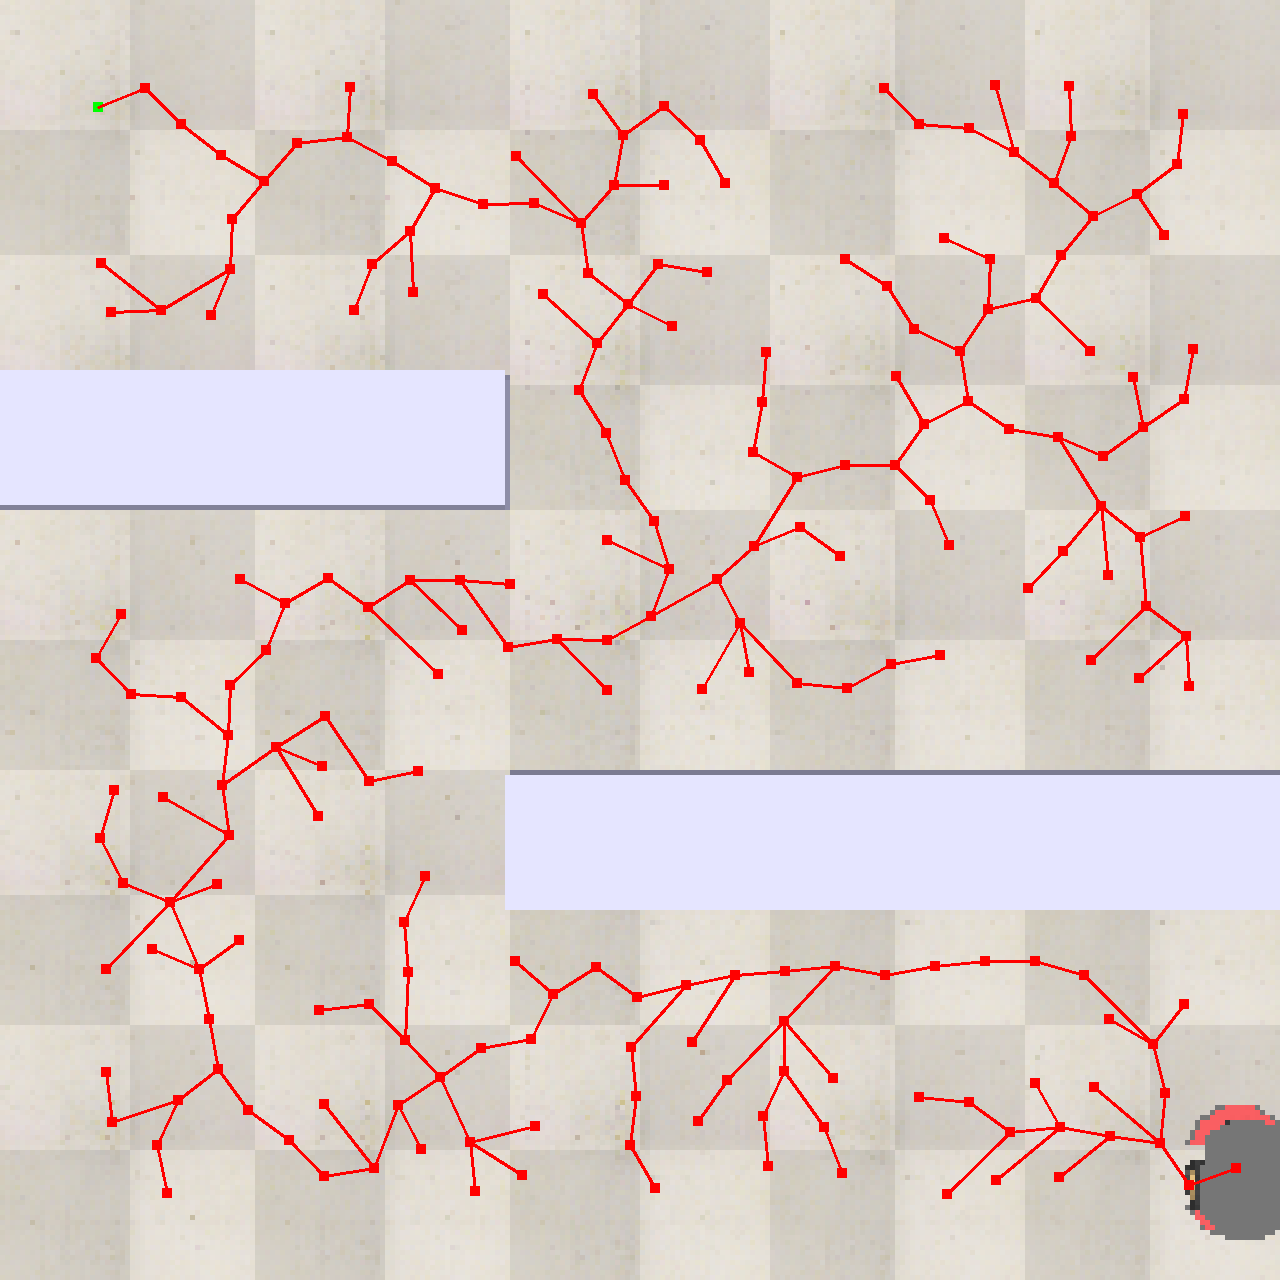

In [145]:
image_p= Image.fromarray(resized)
image_p